# Aufgabe 2
## Ahmed Adnan, Nicolas Huhle, Eugen Erb

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.io import imread

#### read the pics

In [13]:
bild01 = imread("bild01.jpg")
bild02 = imread("bild02.jpg")

#### display them

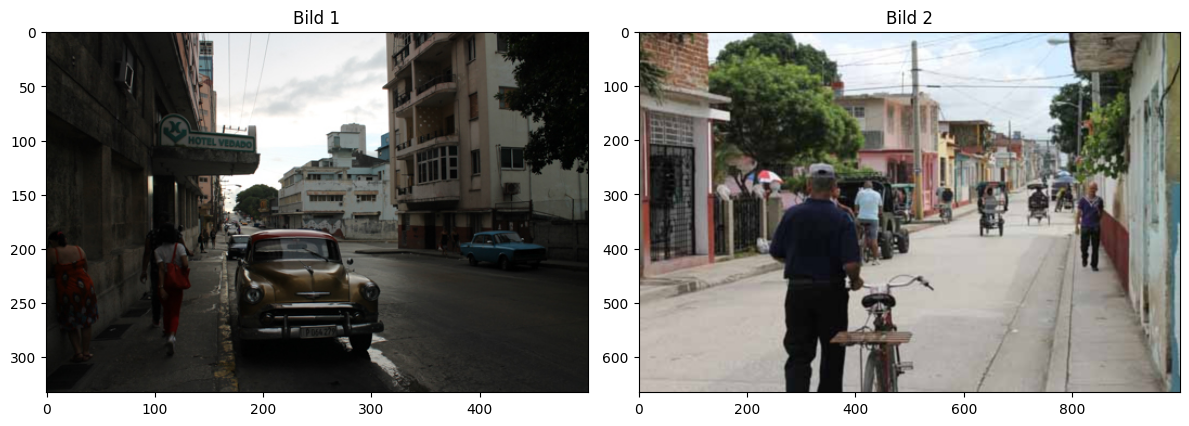

In [15]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(bild01)
plt.title("Bild 1")

plt.subplot(1, 2, 2)
plt.imshow(bild02)
plt.title("Bild 2")

plt.tight_layout()
plt.show()


### Cumulative Histograms:
A histogram counts how many pixels have each intensity (0–255).

A cumulative histogram (or CDF) sums those counts up to each intensity value:

cdf[i] = hist[0] + hist[1] + ... + hist[i]

In [16]:
def compute_cumHisto(image):
    """
    Computes the normalized cumulative histogram (CDF) of an 8-bit grayscale image.
    
    Parameters:
        image (2D numpy array): grayscale image with pixel values in range 0–255

    Returns:
        cum_histo (1D numpy array of length 256): normalized cumulative histogram
    """
    # initialize histogram (256 bins)
    histo = np.zeros(256, dtype=int)
    
    # fill the histogram
    height, width = image.shape
    for y in range(height):
        for x in range(width):
            pixel = image[y, x]
            histo[pixel] += 1
    
    # cumulative sum
    cum_histo = np.cumsum(histo)
    
    # normalize to [0, 1]
    cum_histo = cum_histo / cum_histo[-1]  # divide by total number of pixels
    
    return cum_histo


#### Load a grayscale image and test the function:

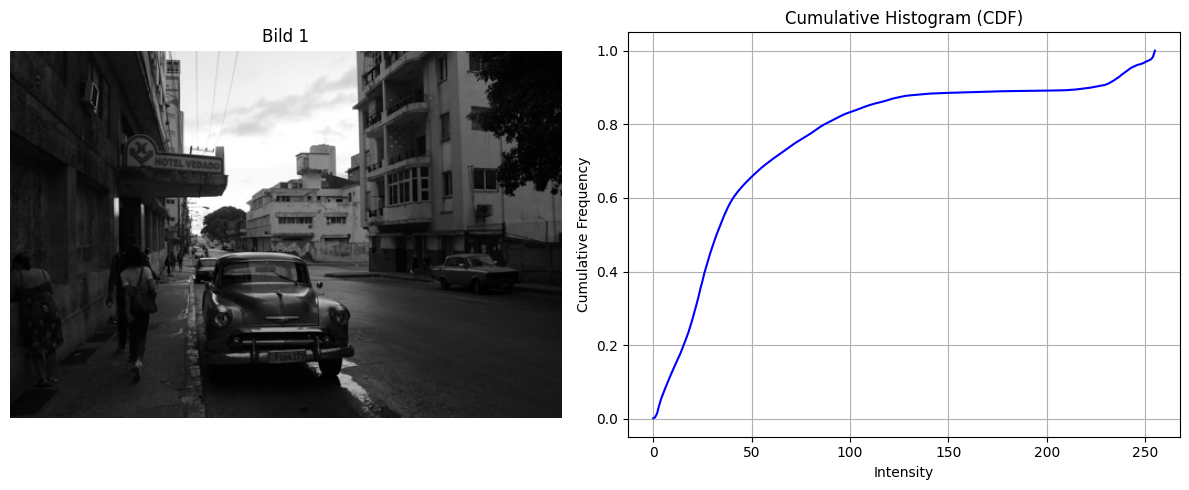

In [22]:
image_gray = imread("bild01.jpg", as_gray=True)

# convert float image to 8-bit integer range [0, 255]
image_gray = (image_gray * 255).astype(np.uint8)

#cumulative histogram
cum_histo = compute_cumHisto(image_gray)

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

axes[0].imshow(image_gray, cmap='gray')
axes[0].set_title("Bild 1")
axes[0].axis('off')

# cumulative Histogram
axes[1].plot(cum_histo, color='blue')
axes[1].set_title("Cumulative Histogram (CDF)")
axes[1].set_xlabel("Intensity")
axes[1].set_ylabel("Cumulative Frequency")
axes[1].grid(True)

plt.tight_layout()
plt.show()

### Q/ What is a homogeneous and a non-homogeneous point operation? <br>
#### Homogeneous point operation:
Applies the same transformation to every pixel in the image.<br>
The operation does not depend on the pixel’s location.

#### Non-homogeneous point operation:
The transformation varies across the image, depending on: <BR>
Pixel position, Local context Or other spatially varying factors
Example: brightness changes based on pixel position (e.g., vignette effect)

### Q/ What is the difference between point operations and filter operations? <br>
#### point operations:
-Affect each pixel individually<br>
-Only the pixel’s own value is used<br>
-No neighboring pixels involved<br>

#### filter operations:
-Affect each pixel based on its neighborhood (surrounding pixels)<br>
-Typically use a kernel (e.g., 3x3 matrix)<br>
-Involve convolution or similar processing<br>
Example: Blurring (Gaussian filter)